In [1]:
# !conda upgrade -n base -c defaults --override-channels conda
# !echo "Y" | conda install pytorch torchvision -c pytorch
# !conda install pytorch torchvision --yes -c pytorch
# !conda install pytorch --yes -c pytorch
# !pip install pytorch

In [2]:
import torch
torch.__version__

'2.4.1+cu121'

In [3]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
from collections import OrderedDict

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        



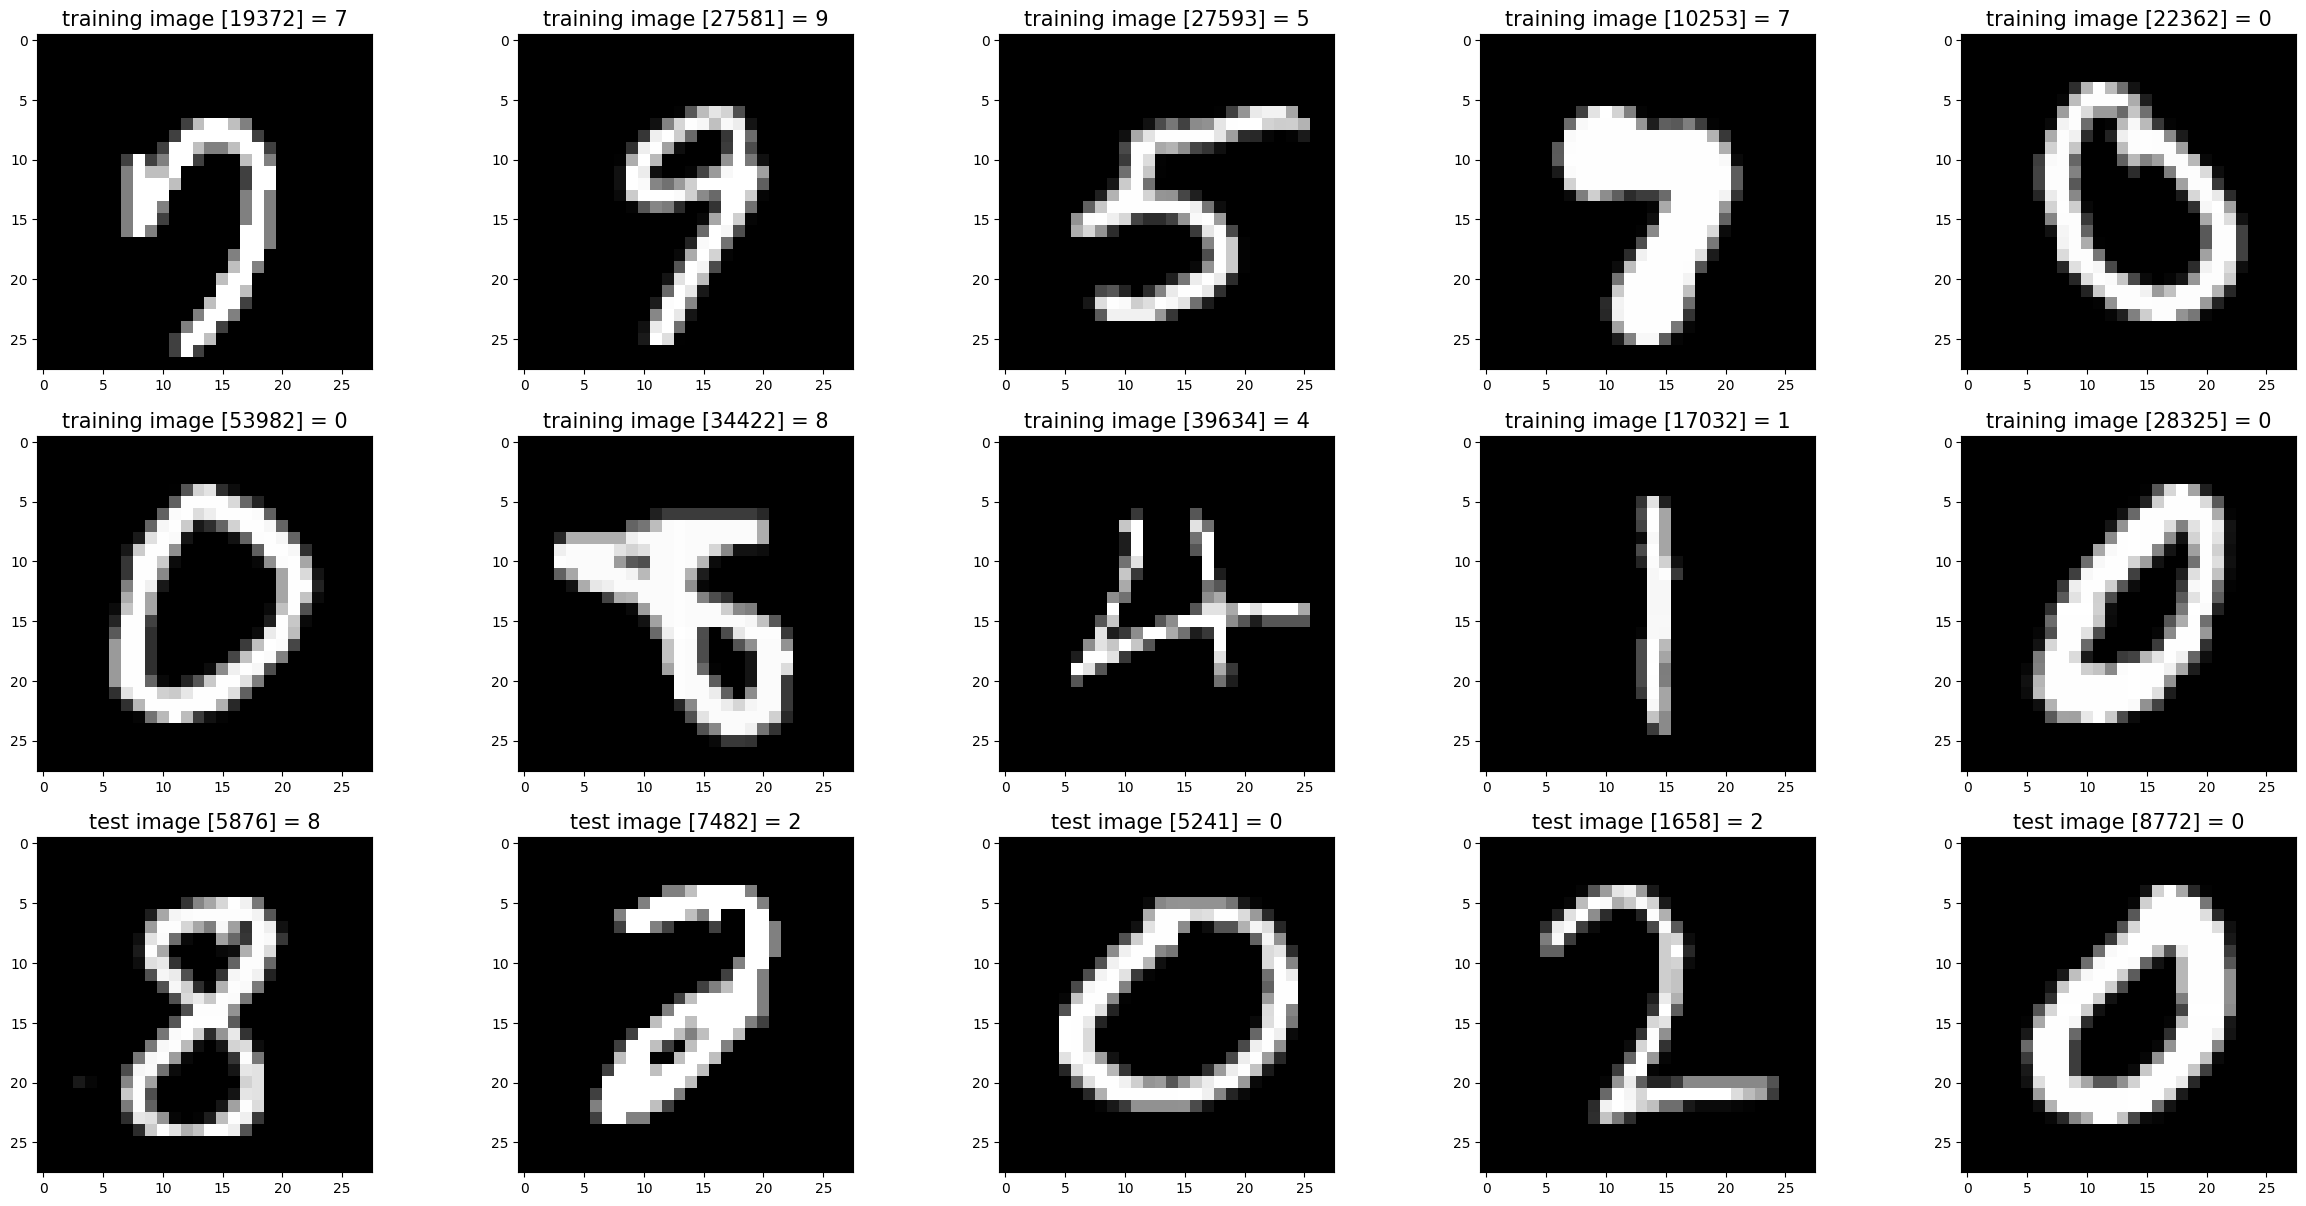

In [4]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

#
# Set file paths based on added MNIST Datasets
#
input_path = '../input'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [5]:
import torch
from torch import nn
import os
example_tensor = torch.tensor(x_train[0])
print(example_tensor)
print(y_train[0])
print(type(x_train[0]))
print(type(example_tensor))
print(example_tensor.shape)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<ipython-input-5-0a4eb0416e76>:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  example_tensor = torch.tensor(x_train[0])


In [6]:
# mypy: allow-untyped-defs
from typing import Tuple, Union
from torch.nn import Module
from torch import Tensor
from torch.utils.data import DataLoader



__all__ = ["Flatten", "Unflatten"]



class Flatten(Module):
    r"""
    Flattens a contiguous range of dims into a tensor.

    For use with :class:`~nn.Sequential`, see :meth:`torch.flatten` for details.

    Shape:
        - Input: :math:`(*, S_{\text{start}},..., S_{i}, ..., S_{\text{end}}, *)`,'
          where :math:`S_{i}` is the size at dimension :math:`i` and :math:`*` means any
          number of dimensions including none.
        - Output: :math:`(*, \prod_{i=\text{start}}^{\text{end}} S_{i}, *)`.

    Args:
        start_dim: first dim to flatten (default = 1).
        end_dim: last dim to flatten (default = -1).

    Examples::
        >>> input = torch.randn(32, 1, 5, 5)
        >>> # With default parameters
        >>> m = nn.Flatten()
        >>> output = m(input)
        >>> output.size()
        torch.Size([32, 25])
        >>> # With non-default parameters
        >>> m = nn.Flatten(0, 2)
        >>> output = m(input)
        >>> output.size()
        torch.Size([160, 5])
    """

    __constants__ = ["start_dim", "end_dim"]
    start_dim: int
    end_dim: int

    def __init__(self, start_dim: int = 1, end_dim: int = -1) -> None:
        super().__init__()
        self.start_dim = start_dim
        self.end_dim = end_dim

    def forward(self, input: Tensor) -> Tensor:
        return input.flatten(self.start_dim, self.end_dim)

    def extra_repr(self) -> str:
        return f"start_dim={self.start_dim}, end_dim={self.end_dim}"




class Unflatten(Module):
    r"""
    Unflattens a tensor dim expanding it to a desired shape. For use with :class:`~nn.Sequential`.

    * :attr:`dim` specifies the dimension of the input tensor to be unflattened, and it can
      be either `int` or `str` when `Tensor` or `NamedTensor` is used, respectively.

    * :attr:`unflattened_size` is the new shape of the unflattened dimension of the tensor and it can be
      a `tuple` of ints or a `list` of ints or `torch.Size` for `Tensor` input;  a `NamedShape`
      (tuple of `(name, size)` tuples) for `NamedTensor` input.

    Shape:
        - Input: :math:`(*, S_{\text{dim}}, *)`, where :math:`S_{\text{dim}}` is the size at
          dimension :attr:`dim` and :math:`*` means any number of dimensions including none.
        - Output: :math:`(*, U_1, ..., U_n, *)`, where :math:`U` = :attr:`unflattened_size` and
          :math:`\prod_{i=1}^n U_i = S_{\text{dim}}`.

    Args:
        dim (Union[int, str]): Dimension to be unflattened
        unflattened_size (Union[torch.Size, Tuple, List, NamedShape]): New shape of the unflattened dimension

    Examples:
        >>> input = torch.randn(2, 50)
        >>> # With tuple of ints
        >>> m = nn.Sequential(
        >>>     nn.Linear(50, 50),
        >>>     nn.Unflatten(1, (2, 5, 5))
        >>> )
        >>> output = m(input)
        >>> output.size()
        torch.Size([2, 2, 5, 5])
        >>> # With torch.Size
        >>> m = nn.Sequential(
        >>>     nn.Linear(50, 50),
        >>>     nn.Unflatten(1, torch.Size([2, 5, 5]))
        >>> )
        >>> output = m(input)
        >>> output.size()
        torch.Size([2, 2, 5, 5])
        >>> # With namedshape (tuple of tuples)
        >>> input = torch.randn(2, 50, names=('N', 'features'))
        >>> unflatten = nn.Unflatten('features', (('C', 2), ('H', 5), ('W', 5)))
        >>> output = unflatten(input)
        >>> output.size()
        torch.Size([2, 2, 5, 5])
    """

    NamedShape = Tuple[Tuple[str, int]]

    __constants__ = ["dim", "unflattened_size"]
    dim: Union[int, str]
    unflattened_size: Union[NamedShape]

    def __init__(
        self, dim: Union[int, str], unflattened_size: Union[NamedShape]
    ) -> None:
        super().__init__()

        if isinstance(dim, int):
            self._require_tuple_int(unflattened_size)
        elif isinstance(dim, str):
            self._require_tuple_tuple(unflattened_size)
        else:
            raise TypeError("invalid argument type for dim parameter")

        self.dim = dim
        self.unflattened_size = unflattened_size

    def _require_tuple_tuple(self, input):
        if isinstance(input, tuple):
            for idx, elem in enumerate(input):
                if not isinstance(elem, tuple):
                    raise TypeError(
                        "unflattened_size must be tuple of tuples, "
                        + f"but found element of type {type(elem).__name__} at pos {idx}"
                    )
            return
        raise TypeError(
            "unflattened_size must be a tuple of tuples, "
            + f"but found type {type(input).__name__}"
        )

    def _require_tuple_int(self, input):
        if isinstance(input, (tuple, list)):
            for idx, elem in enumerate(input):
                if not isinstance(elem, int):
                    raise TypeError(
                        "unflattened_size must be tuple of ints, "
                        + f"but found element of type {type(elem).__name__} at pos {idx}"
                    )
            return
        raise TypeError(
            f"unflattened_size must be a tuple of ints, but found type {type(input).__name__}"
        )

    def forward(self, input: Tensor) -> Tensor:
        return input.unflatten(self.dim, self.unflattened_size)

    def extra_repr(self) -> str:
        return f"dim={self.dim}, unflattened_size={self.unflattened_size}"


In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 28*28),
            nn.ReLU(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = torch.Tensor(x)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): ReLU()
    (2): Linear(in_features=784, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [9]:
print([n for n, _ in model.named_modules()])

['', 'flatten', 'linear_relu_stack', 'linear_relu_stack.0', 'linear_relu_stack.1', 'linear_relu_stack.2', 'linear_relu_stack.3', 'linear_relu_stack.4']


In [10]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [11]:
x_train_tensor = [torch.Tensor(x) for x in x_train]
x_test_tensor = [torch.Tensor(x) for x in x_test]

In [12]:
training_data = list(zip(x_train_tensor, y_train))
test_data = list(zip(x_test_tensor, y_test))

In [13]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def get_grads_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    grads = OrderedDict()

    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()

        for idx, param in enumerate(model.parameters()):
            grads[f"layer_{idx}"] = param.grad.data/size

    optimizer.zero_grad()

    return grads


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [15]:
print(training_data[0])

(tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.

In [16]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [17]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 11.575624  [   64/60000]
loss: 0.384534  [ 6464/60000]
loss: 0.354496  [12864/60000]
loss: 0.313519  [19264/60000]
loss: 0.121386  [25664/60000]
loss: 0.430855  [32064/60000]
loss: 0.138062  [38464/60000]
loss: 0.417948  [44864/60000]
loss: 0.248647  [51264/60000]
loss: 0.438274  [57664/60000]
Test Error: 
 Accuracy: 94.3%, Avg loss: 0.182919 

Epoch 2
-------------------------------
loss: 0.050827  [   64/60000]
loss: 0.153020  [ 6464/60000]
loss: 0.145896  [12864/60000]
loss: 0.105230  [19264/60000]
loss: 0.037365  [25664/60000]
loss: 0.262727  [32064/60000]
loss: 0.078682  [38464/60000]
loss: 0.265909  [44864/60000]
loss: 0.170687  [51264/60000]
loss: 0.323717  [57664/60000]
Test Error: 
 Accuracy: 95.5%, Avg loss: 0.144298 

Epoch 3
-------------------------------
loss: 0.030534  [   64/60000]
loss: 0.128171  [ 6464/60000]
loss: 0.098045  [12864/60000]
loss: 0.067060  [19264/60000]
loss: 0.023655  [25664/60000]
loss: 0.175422  [32064/60

In [18]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se

In [19]:
for module in model.named_modules():
    print(module[1])

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): ReLU()
    (2): Linear(in_features=784, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)
Flatten(start_dim=1, end_dim=-1)
Sequential(
  (0): Linear(in_features=784, out_features=784, bias=True)
  (1): ReLU()
  (2): Linear(in_features=784, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
)
Linear(in_features=784, out_features=784, bias=True)
ReLU()
Linear(in_features=784, out_features=256, bias=True)
ReLU()
Linear(in_features=256, out_features=10, bias=True)


In [20]:
print(dir(model.linear_relu_stack[0]))

['T_destination', '__annotations__', '__call__', '__class__', '__constants__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_compiled_call_impl', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_name', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_post_hooks', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persistent_buffers_set', '_parameters', '_register_load_s

In [21]:
linear_layer_1 = model.linear_relu_stack[0]
relu_layer_1 = model.linear_relu_stack[1]
linear_layer_2 = model.linear_relu_stack[2]

In [22]:
print(linear_layer_1.weight)

Parameter containing:
tensor([[-0.0163,  0.0199, -0.0295,  ...,  0.0123, -0.0257,  0.0353],
        [-0.0183, -0.0195, -0.0254,  ...,  0.0114, -0.0081, -0.0040],
        [ 0.0022,  0.0050, -0.0284,  ..., -0.0133, -0.0125,  0.0124],
        ...,
        [-0.0219,  0.0151,  0.0341,  ..., -0.0295,  0.0115, -0.0282],
        [-0.0151, -0.0060, -0.0269,  ...,  0.0043, -0.0307, -0.0320],
        [ 0.0030, -0.0228, -0.0173,  ...,  0.0125, -0.0269,  0.0215]],
       requires_grad=True)


tensor([[  81.1471,   46.5173,  347.9342,  ...,   67.6055,   46.5754,
          128.0414],
        [  46.5173,   26.6659,  199.4521,  ...,   38.7546,   26.6992,
           73.3993],
        [ 347.9342,  199.4521, 1491.8370,  ...,  289.8719,  199.7012,
          549.0031],
        ...,
        [  67.6055,   38.7546,  289.8719,  ...,   56.3237,   38.8030,
          106.6742],
        [  46.5754,   26.6992,  199.7012,  ...,   38.8030,   26.7325,
           73.4910],
        [ 128.0414,   73.3993,  549.0031,  ...,  106.6742,   73.4910,
          202.0357]], grad_fn=<MmBackward0>)
torch.Size([784])
tensor(3320.8845, grad_fn=<SqueezeBackward0>)
tensor(1., grad_fn=<DivBackward0>)
-30118.787


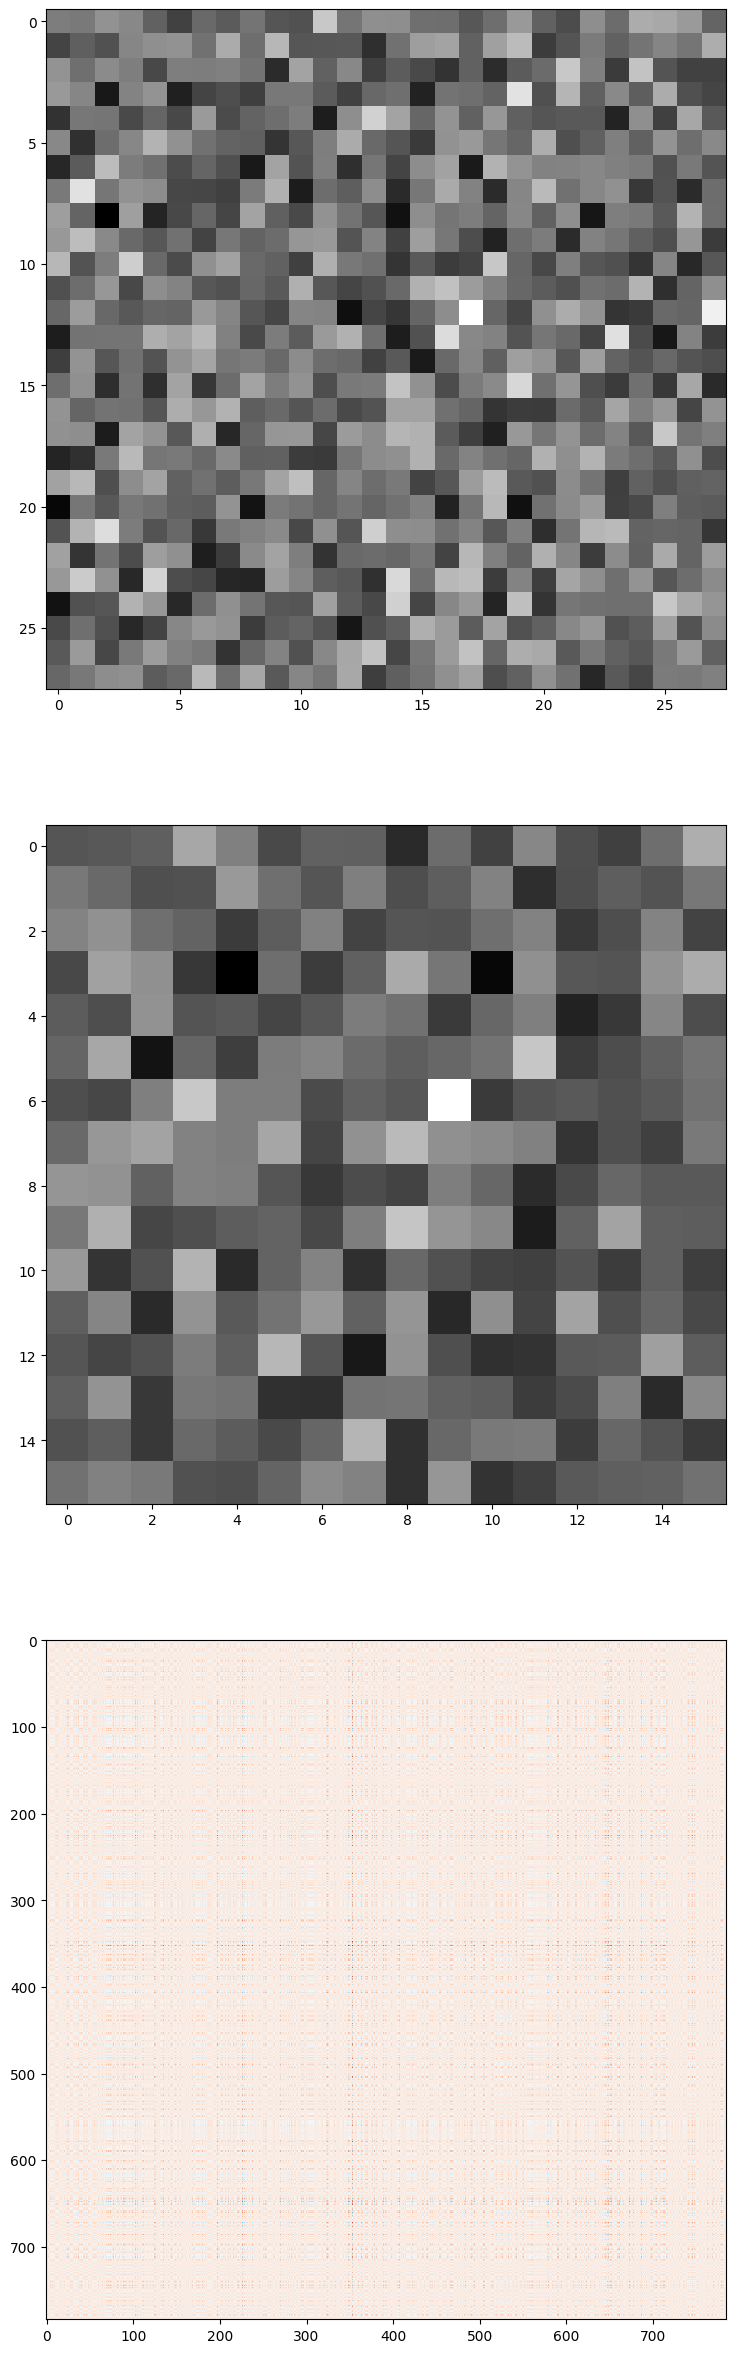

In [23]:
flat_x_train_tensor_1 = torch.flatten(x_train_tensor[1])
linear_layer_1_out = linear_layer_1(flat_x_train_tensor_1)
relu_layer_1_out = relu_layer_1(linear_layer_1_out)
linear_layer_2_out = linear_layer_2(relu_layer_1_out)
linear_layer_2_out_image = linear_layer_2_out.reshape((16, -1)).detach().numpy()
# print(linear_layer_1_out.shape)
# print(linear_layer_1_out.reshape((28, -1)))
linear_layer_1_out_image = linear_layer_1_out.reshape((28, -1)).detach().numpy()
linear_layer_1_out_cross_matrix = (linear_layer_1_out.reshape((-1, 1)) @ linear_layer_1_out.reshape((1, -1))).detach().numpy()
plt.figure(figsize=(10,30))
plt.subplot(3, 1, 1)  
plt.imshow(linear_layer_1_out_image, cmap=plt.cm.gray)
plt.subplot(3, 1, 2)  
plt.imshow(linear_layer_2_out_image, cmap=plt.cm.gray)
plt.subplot(3, 1, 3)
plt.imshow(linear_layer_1_out_cross_matrix, cmap=plt.cm.RdBu, norm = mpl.colors.Normalize(vmin=linear_layer_1_out_cross_matrix.min(), vmax=linear_layer_1_out_cross_matrix.max()))

print(linear_layer_1_out.reshape((-1, 1)) @ linear_layer_1_out.reshape((1, -1)))
print(linear_layer_1_out.shape)
print(torch.cov(linear_layer_1_out))
print(torch.corrcoef(linear_layer_1_out))
print(linear_layer_1_out_cross_matrix.min())

In [24]:
x = torch.tensor([[0, 1, 2], [2, 1, 0]])
torch.corrcoef(x)
x = torch.randn(2, 4)
x
torch.corrcoef(x)
torch.corrcoef(x[0])

tensor(1.)

In [25]:
print(torch.__version__)

2.4.1+cu121


7
[False False False ... False  True False]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  69 152
  237 254 254 255 254 252  52   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  87 164 237 253 254
  218 138  83  39 154 254 135   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 138 246 253 254 216 167  54
    5   0   0   0 100 191   3   0   0   0]
 [  0   0   0   0   

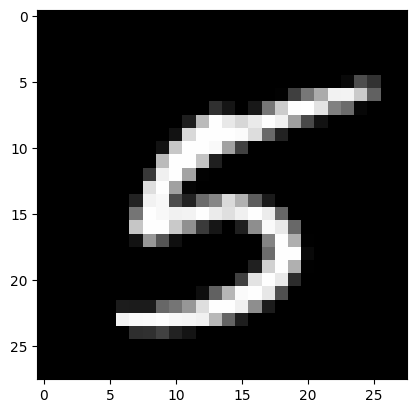

In [26]:
print(y_test[0])

type(y_test[0])
fives_idx = np.array(np.array(y_test) == 5)
print(fives_idx)
fives = np.array(x_test)[fives_idx]

print(fives[2])
plt.imshow(fives[4], cmap=plt.cm.gray)

zeros_idx = np.array(np.array(y_test) == 0)
zeros = np.array(x_test)[zeros_idx]
print(len(zeros), len(fives))

In [27]:
print(model.linear_relu_stack[:-1])
model.linear_relu_stack[:-1](flat_x_train_tensor_1)

Sequential(
  (0): Linear(in_features=784, out_features=784, bias=True)
  (1): ReLU()
  (2): Linear(in_features=784, out_features=256, bias=True)
  (3): ReLU()
)


tensor([ 0.0000,  0.0000,  0.0000, 20.7689,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  3.2245,  0.0000,  0.0000,  0.0000, 24.6335,
         0.0000,  0.0000,  0.0000,  0.0000, 13.3570,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.3570,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         1.6804,  8.5408,  0.0000,  0.0000,  0.0000,  0.0000,  0.1003,  0.0000,
         0.0000,  0.0000,  0.0000,  0.4520,  0.0000,  0.0000,  1.4041,  0.0000,
         0.0000, 17.5965,  8.0752,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        22.7097,  0.0000,  0.0000,  8.4250,  0.0000,  0.0000, 10.4385, 23.4715,
         0.0000,  0.0000,  9.4987,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  2.7243,  0.0000,
         0.0000, 20.6622,  0.0000,  0.0000,  0.0000,  0.0000,  2.0616,  0.0000,
         0.0000,  0.0000,  0.0000, 37.9367,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, 39.46

In [28]:
layer_2_out_pre_activation = model.linear_relu_stack[:-2]
print(layer_2_out_pre_activation)
norm = len(zeros)
avg_out_zeros = torch.zeros(model.linear_relu_stack[-3].weight.shape[0])
for tensor_ in zeros:
    flattened_input = torch.flatten(torch.tensor(tensor_, dtype=torch.float))

    avg_out_zeros += layer_2_out_pre_activation(flattened_input)
avg_out_zeros /= norm
print(avg_out_zeros)

avg_out_fives = torch.zeros(model.linear_relu_stack[-3].weight.shape[0])
for tensor_ in fives:
    flattened_input = torch.flatten(torch.tensor(tensor_, dtype=torch.float))

    avg_out_fives += layer_2_out_pre_activation(flattened_input)
avg_out_fives /= norm


Sequential(
  (0): Linear(in_features=784, out_features=784, bias=True)
  (1): ReLU()
  (2): Linear(in_features=784, out_features=256, bias=True)
)
tensor([-22.9483, -32.3379, -31.8113,   0.8785, -10.6557, -19.6642, -25.6225,
         -8.6776, -38.3952,  -4.4201, -20.5140,   0.6042, -15.7308, -33.7498,
         -9.4174,  30.8068,   2.7688, -14.4300, -26.2817, -24.8420,  -0.4821,
        -24.6553, -31.3215, -21.7694,  -7.2931, -23.5582,  -0.9133, -47.2871,
        -39.6206, -22.6933, -43.5010, -19.6680,  -9.0927,   5.3438, -29.3988,
         -3.7995, -49.2557, -22.3835, -18.3962, -25.7256, -23.9222, -21.0493,
        -16.7414,   2.8731, -32.6778, -17.5228,  -2.3401, -27.8865, -40.5204,
         -5.6249,   1.3874, -37.9461, -63.6471,  -3.6395, -31.1932, -34.0266,
         13.7595,  -7.4328, -50.3703,  15.6380, -11.7581, -19.8621,   4.4707,
         -3.3084, -22.5742, -16.9606,   0.9219, -23.5034, -20.7076, -38.4332,
        -11.4648, -12.0494,  -9.1969, -24.4237,  -6.2133,   6.3179, -34.

In [29]:
layer_2_out_pre_activation = model.linear_relu_stack[:-2]
print(layer_2_out_pre_activation)
norm = len(zeros)**2
print(norm)
shape = (model.linear_relu_stack[-3].weight.shape[0], model.linear_relu_stack[-3].weight.shape[0])
cov_out_zeros = torch.zeros(shape)
for tensor_ in zeros:
    flattened_input = torch.flatten(torch.tensor(tensor_, dtype=torch.float))
    cov_input = (layer_2_out_pre_activation(flattened_input) - avg_out_zeros).reshape((-1, 1)) @ (layer_2_out_pre_activation(flattened_input) - avg_out_zeros).reshape((1, -1))
    cov_out_zeros += cov_input
cov_out_zeros /= norm
print(cov_out_zeros)

cov_out_fives = torch.zeros(shape)
for tensor_ in fives:
    flattened_input = torch.flatten(torch.tensor(tensor_, dtype=torch.float))
    cov_input = (layer_2_out_pre_activation(flattened_input) - avg_out_fives).reshape((-1, 1)) @ (layer_2_out_pre_activation(flattened_input) - avg_out_fives).reshape((1, -1))
    cov_out_fives += cov_input
cov_out_fives /= norm
print(cov_out_fives)


flattened_input = torch.flatten(torch.tensor(fives[0], dtype=torch.float))
test_out = (layer_2_out_pre_activation(flattened_input) - avg_out_fives).reshape((-1, 1)) @ (layer_2_out_pre_activation(flattened_input) - avg_out_fives).reshape((1, -1))

Sequential(
  (0): Linear(in_features=784, out_features=784, bias=True)
  (1): ReLU()
  (2): Linear(in_features=784, out_features=256, bias=True)
)
960400
tensor([[ 0.1481,  0.0671, -0.0087,  ...,  0.0736,  0.0430, -0.0267],
        [ 0.0671,  0.2404, -0.0840,  ...,  0.0372,  0.0038, -0.0352],
        [-0.0087, -0.0840,  0.1877,  ...,  0.0235,  0.0256,  0.0012],
        ...,
        [ 0.0736,  0.0372,  0.0235,  ...,  0.1669,  0.0140, -0.0247],
        [ 0.0430,  0.0038,  0.0256,  ...,  0.0140,  0.1183,  0.0247],
        [-0.0267, -0.0352,  0.0012,  ..., -0.0247,  0.0247,  0.1646]],
       grad_fn=<DivBackward0>)
tensor([[ 0.1329,  0.0470, -0.0361,  ...,  0.0189,  0.0073, -0.0356],
        [ 0.0470,  0.1585, -0.0229,  ...,  0.0102, -0.0010, -0.0439],
        [-0.0361, -0.0229,  0.1237,  ...,  0.0387,  0.0298, -0.0267],
        ...,
        [ 0.0189,  0.0102,  0.0387,  ...,  0.2618,  0.1031, -0.0189],
        [ 0.0073, -0.0010,  0.0298,  ...,  0.1031,  0.1743, -0.0190],
        [-0.0356,

In [30]:
model.linear_relu_stack[-3].weight.shape[0]

256

In [31]:
layer_2_weights = model.linear_relu_stack[-3].weight
M = layer_2_weights @ layer_2_weights.T
print(M)

tensor([[ 0.3312, -0.0050,  0.0044,  ..., -0.0045, -0.0097,  0.0032],
        [-0.0050,  0.3313, -0.0267,  ..., -0.0128,  0.0044,  0.0086],
        [ 0.0044, -0.0267,  0.3426,  ...,  0.0026,  0.0006, -0.0078],
        ...,
        [-0.0045, -0.0128,  0.0026,  ...,  0.3182, -0.0062,  0.0117],
        [-0.0097,  0.0044,  0.0006,  ..., -0.0062,  0.3423, -0.0061],
        [ 0.0032,  0.0086, -0.0078,  ...,  0.0117, -0.0061,  0.3348]],
       grad_fn=<MmBackward0>)


(256, 256)


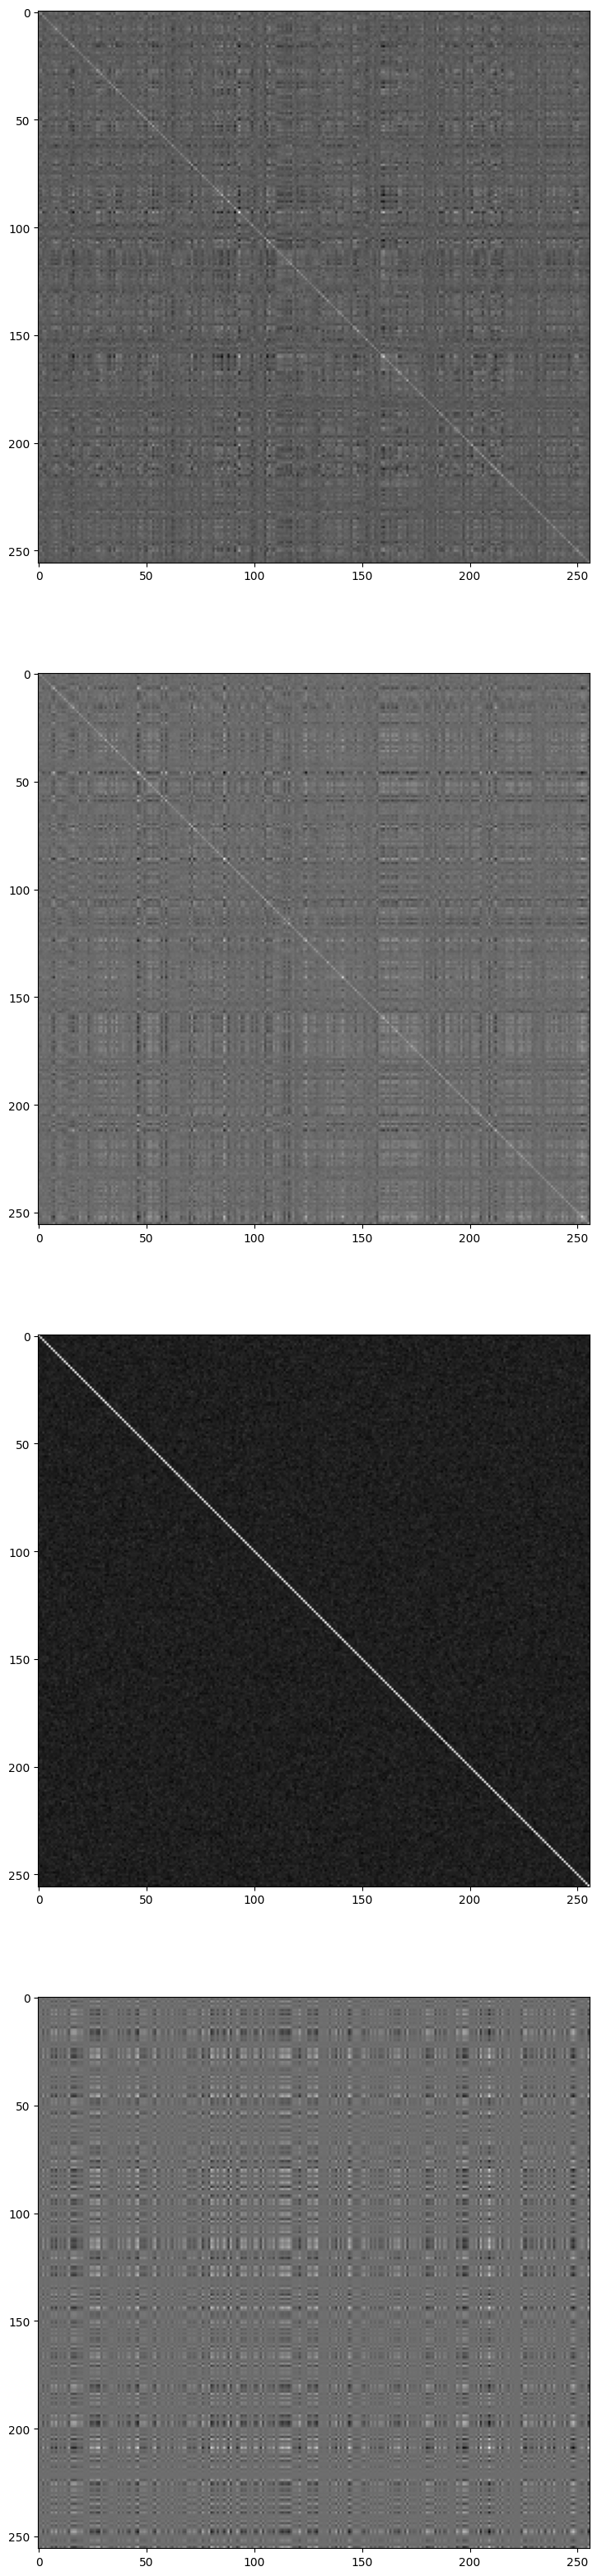

In [32]:
out = avg_out_zeros
out_mat = out.reshape((-1, 1)) @ out.reshape((1, -1))
cov_in = torch.stack((out, out))

covariance = torch.cov(cov_in.T, correction=0).detach().numpy()
print(covariance.shape)
covariance_ = (out.reshape((-1, 1)) @ out.reshape((1, -1))).detach().numpy()
plt.figure(figsize=(10,40))
plt.subplot(4, 1, 1)  
plt.imshow(cov_out_zeros.detach().numpy(), cmap=plt.cm.gray)
plt.subplot(4, 1, 2)  
plt.imshow(cov_out_fives.detach().numpy(), cmap=plt.cm.gray)
plt.subplot(4, 1, 3)  
plt.imshow(M.detach().numpy(), cmap=plt.cm.gray)
plt.subplot(4, 1, 4)
plt.imshow(test_out.detach().numpy(), cmap=plt.cm.gray)

In [33]:
size = len(zeros)
zeros_labels = torch.ones([size], dtype=torch.long)
zeros_x = [torch.tensor(elem, dtype=torch.float) for elem in zeros]

In [34]:

zeros_for_dataloader = list(zip(zeros_x, zeros_labels))
dataloader_zeros = DataLoader(zeros_for_dataloader, batch_size=64)

In [35]:
grads_zeros = get_grads_loop(dataloader_zeros, model, loss_fn, optimizer)
print(grads_zeros)

OrderedDict([('layer_0', tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])), ('layer_1', tensor([-3.4473e-05,  9.7103e-06, -5.0301e-06, -4.6727e-05,  2.4604e-05,
        -1.1398e-05,  5.3346e-05,  1.6008e-06, -4.1359e-05,  2.1268e-05,
         9.9416e-05, -1.5652e-04, -2.7391e-05, -1.5567e-05, -2.6270e-05,
        -5.8073e-06, -6.2524e-06, -8.5269e-06,  1.7387e-05,  7.2313e-06,
        -1.2157e-05,  5.7329e-06,  5.4738e-05,  1.4237e-05,  7.2371e-05,
         6.7177e-05,  3.6449e-05, -2.3759e-06,  6.7580e-06,  7.6814e-05,
        -7.6374e-06, -1.4161e-04, -2.7727e-05, -3.3026e-05, -1.2357e-05,
         4.5038e-05, -6.9772e-05,  3.0175e-05, -3.1629e-06, -5.3233e-05,
         1.0322e-05, -5.1266e-05,  2.2915e-05, -2.4807e-05,  4.6102e-05,
         1.3741e-06,  1.8765e-05,  2.3555e-05, -2.

In [36]:
for param in model.parameters():
    try:
        print(param.grad.data)
    except(AttributeError):
        print(param)

Parameter containing:
tensor([[-0.0163,  0.0199, -0.0295,  ...,  0.0123, -0.0257,  0.0353],
        [-0.0183, -0.0195, -0.0254,  ...,  0.0114, -0.0081, -0.0040],
        [ 0.0022,  0.0050, -0.0284,  ..., -0.0133, -0.0125,  0.0124],
        ...,
        [-0.0219,  0.0151,  0.0341,  ..., -0.0295,  0.0115, -0.0282],
        [-0.0151, -0.0060, -0.0269,  ...,  0.0043, -0.0307, -0.0320],
        [ 0.0030, -0.0228, -0.0173,  ...,  0.0125, -0.0269,  0.0215]],
       requires_grad=True)
Parameter containing:
tensor([ 1.9349e-02, -5.9701e-03,  2.8873e-02,  2.2683e-02, -1.0744e-03,
        -2.3943e-02, -8.4290e-03,  2.0576e-02,  2.2808e-02, -2.4469e-03,
         1.8534e-02,  3.1328e-02, -3.2186e-02,  8.8264e-03, -3.0121e-02,
        -3.0664e-03,  2.4483e-02,  3.5666e-02, -1.3623e-02,  1.3039e-02,
         1.4065e-02,  2.6899e-02,  1.7703e-02, -2.6717e-02,  1.0015e-02,
         2.7367e-02, -1.9011e-03,  1.1124e-02,  4.4508e-03,  3.9395e-03,
        -8.4281e-03,  1.7724e-02, -2.5033e-02, -2.8591e-0